In [1]:
import pandas as pd

# Read the CSV file from the given URL
age_at_marriage = pd.read_csv("https://moderndive.com/data/ageAtMar.csv")

In [2]:
age_at_marriage.head()

,age
0,32
1,25
2,24
3,26
4,32


In [3]:
import pandas as pd
import numpy as np

# Assuming age_at_marriage is already read using pd.read_csv as shown earlier
age_summ = age_at_marriage.describe(percentiles=[.25, .50, .75])
age_summ = age_summ.T[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]
age_summ = age_summ.rename(columns={'count': 'sample_size', 
                                    'std': 'sd', 
                                    '25%': 'lower_quartile', 
                                    '50%': 'median', 
                                    '75%': 'upper_quartile', 
                                    'min': 'minimum', 
                                    'max': 'max'})

In [4]:
age_summ

,sample_size,mean,sd,minimum,lower_quartile,median,upper_quartile,max
age,5534.0,23.440188,4.721365,10.0,20.0,23.0,26.0,43.0


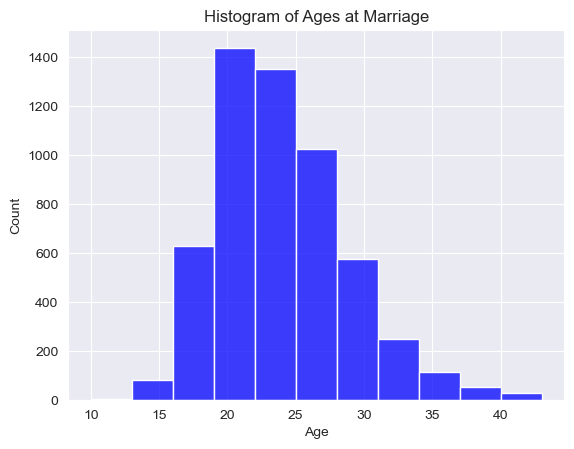

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming age_at_marriage is a pandas DataFrame that has already been loaded
sns.histplot(age_at_marriage['age'], bins=int((age_at_marriage['age'].max() - age_at_marriage['age'].min()) / 3), kde=False, color='blue', edgecolor='white')

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram of Ages at Marriage')
plt.show()

In [6]:
# Assuming age_at_marriage is a pandas DataFrame that has already been loaded
x_bar = age_at_marriage['age'].mean()

print(x_bar)

23.440187929165162


In [16]:
import numpy as np
import pandas as pd

np.random.seed(2018)  # for reproducibility

mu = 23  # null hypothesis mean
reps = 10000  # number of repetitions
sample_size = len(age_at_marriage['age'])  # sample size
std_dev = age_at_marriage['age'].std()  # standard deviation of the original data

# Generating the null distribution
null_distn_one_mean = [np.random.normal(mu, std_dev, sample_size).mean() for _ in range(reps)]
null_distn_one_mean

[22.95692805725677,
 23.03226159405612,
 22.93351329680865,
 23.004477614697553,
 22.843648246049906,
 22.979470824075104,
 23.016782003590198,
 22.940827654320074,
 22.973568465024123,
 22.93451479081873,
 22.94474985776111,
 22.984939959442883,
 22.987686432912817,
 22.957359350940912,
 22.978356932906006,
 22.989773778184556,
 23.014551972281936,
 23.07054304135309,
 22.98775226429098,
 23.046643775618563,
 22.961376494124842,
 22.946328251463633,
 22.897614132874924,
 22.814518237770148,
 22.934373682330783,
 23.016539369546773,
 22.936114995073023,
 22.97638057919371,
 23.017757541284748,
 22.999018288153405,
 23.010033281736508,
 22.958833342180274,
 22.968880633520175,
 23.001730263866442,
 22.855744157486292,
 23.00786708803168,
 23.01379651519149,
 23.019575032226435,
 22.929749281620392,
 22.99662701586869,
 22.981349503260173,
 22.89511450250533,
 23.045817456613833,
 23.043595348678434,
 22.96260008974424,
 22.928919172552835,
 22.953025924745553,
 22.981213872197834,
 23.0

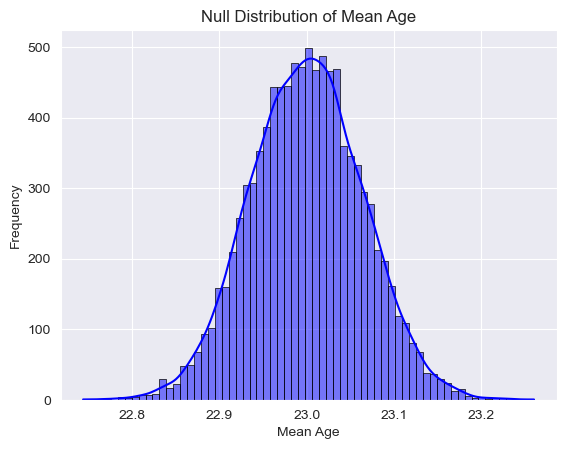

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming null_distn_one_mean is a list or array of mean values

# Plot the null distribution
sns.histplot(null_distn_one_mean, kde=True, color='blue', edgecolor='black')

plt.xlabel('Mean Age')
plt.ylabel('Frequency')
plt.title('Null Distribution of Mean Age')
plt.show()

In [18]:
import numpy as np

# Convert the list to a numpy array for efficient computation
null_distn_array = np.array(null_distn_one_mean)
print(null_distn_array)

# Calculate the p-value for a one-sided test ("greater")
pvalue = np.mean(null_distn_array > x_bar)

# Print the p-value
print("P-value:", pvalue)

[22.95692806 23.03226159 22.9335133  ... 23.01918085 23.0366565
 22.9224642 ]
P-value: 0.0


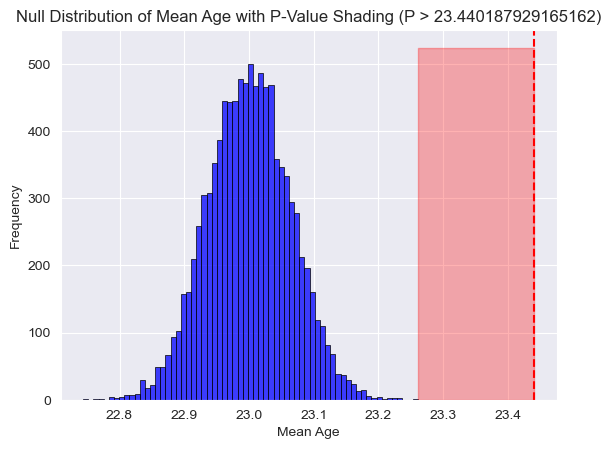

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming null_distn_one_mean is a list or array of mean values and x_bar is the observed mean

# Plotting the null distribution as a histogram
sns.histplot(null_distn_one_mean, kde=False, color="blue", edgecolor="black")

# Calculate the p-value
p_value = np.mean(np.array(null_distn_one_mean) > x_bar)

# Shade the area for the p-value
plt.axvline(x=x_bar, color="red", linestyle="--")  # Observed statistic line
plt.fill_betweenx(y=[0, plt.gca().get_ylim()[1]], x1=x_bar, x2=max(null_distn_one_mean), color='red', alpha=0.3)

plt.xlabel('Mean Age')
plt.ylabel('Frequency')
plt.title(f'Null Distribution of Mean Age with P-Value Shading (P > {x_bar})')
plt.show()

In [20]:
import numpy as np

# Assuming null_distn_one_mean is a list or array of mean values and x_bar is the observed mean

# Convert the list to a numpy array for efficient computation
null_distn_array = np.array(null_distn_one_mean)

# Calculate the p-value for a one-sided test ("greater")
pvalue = np.mean(null_distn_array > x_bar)

print("P-value:", pvalue)

P-value: 0.0


In [21]:
import numpy as np
import pandas as pd

# Assuming age_at_marriage is a pandas DataFrame that has already been loaded

reps = 10000  # Number of bootstrap samples

# Generating the bootstrap distribution of sample means
boot_distn_one_mean = [age_at_marriage['age'].sample(n=len(age_at_marriage), replace=True).mean() for _ in range(reps)]
boot_distn_one_mean

[23.457535236718467,
 23.359595229490424,
 23.244488615829418,
 23.49241055294543,
 23.41705818576075,
 23.43838091796169,
 23.53071919045898,
 23.368449584387424,
 23.419226599204915,
 23.521142031080593,
 23.40296349837369,
 23.388326707625588,
 23.50487893024937,
 23.375677629201302,
 23.479038670039753,
 23.412179255511383,
 23.519877123238164,
 23.417419588001447,
 23.445789663895916,
 23.501807011203468,
 23.360498735092158,
 23.428080954101915,
 23.444705457173836,
 23.441814239248284,
 23.453017708709794,
 23.292013010480666,
 23.473256234188653,
 23.32544271774485,
 23.421033610408383,
 23.496205276472715,
 23.442175641488976,
 23.592880375858332,
 23.395554752439466,
 23.479580773400794,
 23.354716299241055,
 23.436212504517528,
 23.42139501264908,
 23.46096855800506,
 23.504336826888327,
 23.467112396096855,
 23.388507408745934,
 23.39230213227322,
 23.459522949042285,
 23.37350921575714,
 23.443801951572098,
 23.44036863028551,
 23.579689194073005,
 23.480664980122878,
 23.

In [22]:
import numpy as np

# Assuming boot_distn_one_mean is a list or array of bootstrap sample means

# Calculate the 95% confidence interval
lower_bound = np.percentile(boot_distn_one_mean, 2.5)
upper_bound = np.percentile(boot_distn_one_mean, 97.5)

# Print the confidence interval
print("95% Confidence Interval: [{}, {}]".format(lower_bound, upper_bound))

95% Confidence Interval: [23.316769063968195, 23.564691001084206]


95% Confidence Interval: [23.316769063968195, 23.564691001084206]


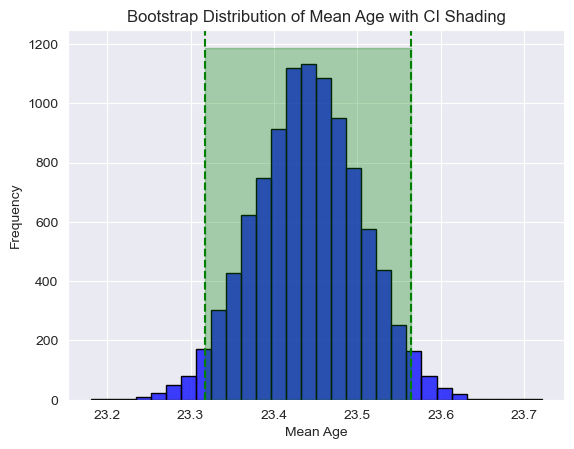

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming boot_distn_one_mean is a list or array of bootstrap sample means

# Step 1: Calculate the 95% confidence interval
lower_bound = np.percentile(boot_distn_one_mean, 2.5)
upper_bound = np.percentile(boot_distn_one_mean, 97.5)
ci = (lower_bound, upper_bound)

# Print the confidence interval
print("95% Confidence Interval: [{}, {}]".format(lower_bound, upper_bound))

# Step 2 & 3: Visualize the bootstrap distribution and shade the confidence interval

# Determine the number of bins for the histogram
bin_width = (max(boot_distn_one_mean) - min(boot_distn_one_mean)) / 30  # Example calculation for bin width
bins = int((max(boot_distn_one_mean) - min(boot_distn_one_mean)) / bin_width)

# Create the histogram for the bootstrap distribution
sns.histplot(boot_distn_one_mean, kde=False, color="blue", edgecolor="black", bins=bins)

# Shade the confidence interval
plt.axvline(x=lower_bound, color="green", linestyle="--")
plt.axvline(x=upper_bound, color="green", linestyle="--")
plt.fill_betweenx(y=[0, plt.gca().get_ylim()[1]], x1=lower_bound, x2=upper_bound, color='green', alpha=0.3)

plt.xlabel('Mean Age')
plt.ylabel('Frequency')
plt.title('Bootstrap Distribution of Mean Age with CI Shading')
plt.show()

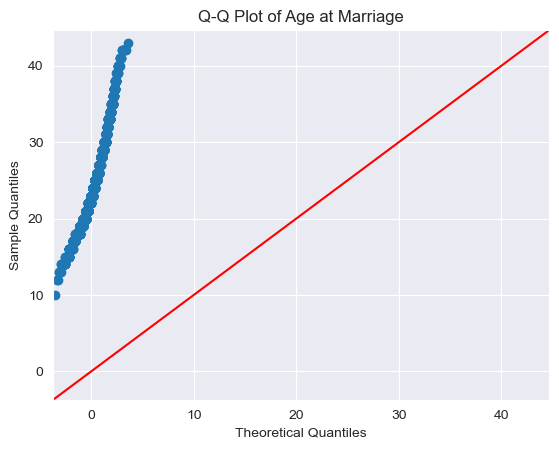

In [27]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Assuming age_at_marriage is a pandas DataFrame and 'age' is a column in it

# Create the Q-Q plot
sm.qqplot(age_at_marriage['age'], line ='45')

plt.title('Q-Q Plot of Age at Marriage')
plt.ylabel('Sample Quantiles')
plt.xlabel('Theoretical Quantiles')
plt.show()

In [28]:
from scipy import stats

# Assuming age_at_marriage is a pandas DataFrame and 'age' is a column in it

# Perform the one-sample t-test
t_test_results = stats.ttest_1samp(age_at_marriage['age'], 23)

# Since we are interested in the alternative hypothesis that the mean is greater than 23,
# we need to divide the p-value by 2 (for a one-sided test) and change its sign if the test statistic is negative
if t_test_results.statistic < 0:
    p_value = 1 - t_test_results.pvalue/2
else:
    p_value = t_test_results.pvalue/2

# Print the results
print("T-statistic:", t_test_results.statistic)
print("P-value:", p_value)

T-statistic: 6.9356970513239045
P-value: 2.252161899464751e-12


In [29]:
from scipy import stats
import numpy as np

# Assuming age_at_marriage is a pandas DataFrame and 'age' is a column in it

# Perform the t-test
t_test_results = stats.ttest_1samp(age_at_marriage['age'], 23)

# Extract the t-statistic and p-value
t_statistic = t_test_results.statistic
p_value = t_test_results.pvalue

# Calculate the degrees of freedom
df = len(age_at_marriage['age']) - 1

# Calculate the standard error
std_error = np.std(age_at_marriage['age'], ddof=1) / np.sqrt(len(age_at_marriage['age']))

# Calculate the confidence interval
confidence_level = 0.95
ci = stats.t.interval(confidence_level, df, loc=np.mean(age_at_marriage['age']), scale=std_error)

# Print the confidence interval
print("95% Confidence Interval:", ci)

95% Confidence Interval: (23.315767665106385, 23.56460819322394)


In [30]:
import pandas as pd

# Create a list with repeated instances of "satisfied" and "unsatisfied"
elec_list = ["satisfied"] * 73 + ["unsatisfied"] * 27

# Convert the list into a DataFrame
elec_df = pd.DataFrame(elec_list, columns=['satisfy'])

# Display the first few rows of the DataFrame
print(elec_df.head())

     satisfy
0  satisfied
1  satisfied
2  satisfied
3  satisfied
4  satisfied


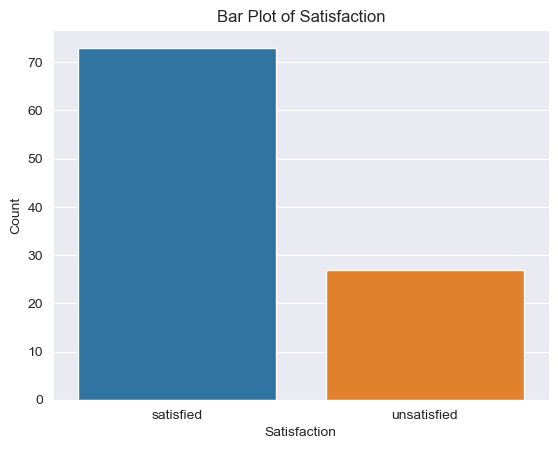

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming elec_df is the pandas DataFrame created previously with the 'satisfy' column

# Create a bar plot
sns.countplot(x='satisfy', data=elec_df)

# Setting plot title and labels
plt.title('Bar Plot of Satisfaction')
plt.xlabel('Satisfaction')
plt.ylabel('Count')
plt.show()

In [32]:
# Calculate the proportion of 'satisfied' responses
p_hat = elec_df['satisfy'].value_counts(normalize=True)['satisfied']

print("Proportion of 'satisfied':", p_hat)

Proportion of 'satisfied': 0.73


In [33]:
import numpy as np
import pandas as pd

# Assuming elec_df is the pandas DataFrame created previously with the 'satisfy' column

np.random.seed(2018)  # Setting the seed for reproducibility

p_null = 0.8  # Null hypothesis proportion
reps = 10000  # Number of repetitions
n = len(elec_df)  # Sample size

# Generating the null distribution
null_distn_one_prop = []
for _ in range(reps):
    # Generate a sample under the null hypothesis
    sample = np.random.choice(['satisfied', 'unsatisfied'], size=n, p=[p_null, 1 - p_null])
    # Calculate and store the proportion of 'satisfied'
    null_distn_one_prop.append(np.mean(sample == 'satisfied'))

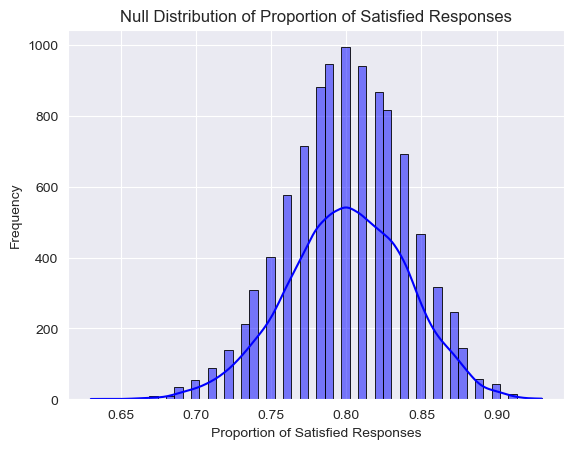

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming null_distn_one_prop is a list or array of proportions

# Plot the null distribution
sns.histplot(null_distn_one_prop, kde=True, color='blue', edgecolor='black')

plt.xlabel('Proportion of Satisfied Responses')
plt.ylabel('Frequency')
plt.title('Null Distribution of Proportion of Satisfied Responses')
plt.show()

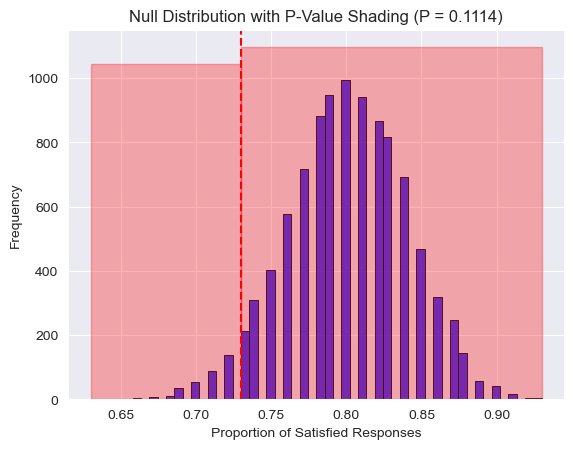

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming null_distn_one_prop is a list or array of proportions and p_hat is the observed proportion

# Plotting the null distribution as a histogram
sns.histplot(null_distn_one_prop, kde=False, color="blue", edgecolor="black")

# Calculate the two-sided p-value
# Count how many proportions in the null distribution are as extreme as or more extreme than p_hat
p_value_lower = np.mean(np.array(null_distn_one_prop) <= p_hat)
p_value_upper = np.mean(np.array(null_distn_one_prop) >= p_hat)
p_value = 2 * min(p_value_lower, p_value_upper)

# Shade the area for the p-value
# For a two-sided test, shade both tails
plt.axvline(x=p_hat, color="red", linestyle="--")  # Observed statistic line
lower_bound = min(null_distn_one_prop)
upper_bound = max(null_distn_one_prop)
plt.fill_betweenx(y=[0, plt.gca().get_ylim()[1]], x1=lower_bound, x2=p_hat, color='red', alpha=0.3)
plt.fill_betweenx(y=[0, plt.gca().get_ylim()[1]], x1=p_hat, x2=upper_bound, color='red', alpha=0.3)

plt.xlabel('Proportion of Satisfied Responses')
plt.ylabel('Frequency')
plt.title(f'Null Distribution with P-Value Shading (P = {p_value:.4f})')
plt.show()

In [36]:
import numpy as np

# Assuming null_distn_one_prop is a list or array of proportions and p_hat is the observed proportion

# Convert the list to a numpy array for efficient computation
null_distn_array = np.array(null_distn_one_prop)

# Calculate the two-sided p-value
# Count how many proportions in the null distribution are as extreme as or more extreme than p_hat
p_value_lower = np.mean(null_distn_array <= p_hat)
p_value_upper = np.mean(null_distn_array >= p_hat)
p_value = 2 * min(p_value_lower, p_value_upper)

# Print the p-value
print("P-value:", p_value)

P-value: 0.1114


In [37]:
reps = 10000  # Number of bootstrap samples

# Generating the bootstrap distribution of the proportion of 'satisfied'
boot_distn_one_prop = [elec_df['satisfy'].sample(frac=1, replace=True).value_counts(normalize=True)['satisfied'] for _ in range(reps)]
boot_distn_one_prop

[0.77,
 0.78,
 0.71,
 0.8,
 0.72,
 0.67,
 0.77,
 0.77,
 0.76,
 0.75,
 0.72,
 0.7,
 0.67,
 0.74,
 0.75,
 0.71,
 0.69,
 0.62,
 0.74,
 0.76,
 0.67,
 0.7,
 0.74,
 0.72,
 0.71,
 0.75,
 0.8,
 0.74,
 0.7,
 0.67,
 0.71,
 0.8,
 0.75,
 0.73,
 0.7,
 0.8,
 0.74,
 0.78,
 0.81,
 0.65,
 0.71,
 0.67,
 0.71,
 0.69,
 0.71,
 0.75,
 0.75,
 0.77,
 0.76,
 0.71,
 0.75,
 0.78,
 0.66,
 0.72,
 0.75,
 0.74,
 0.67,
 0.7,
 0.73,
 0.69,
 0.72,
 0.72,
 0.64,
 0.74,
 0.73,
 0.79,
 0.75,
 0.77,
 0.65,
 0.75,
 0.7,
 0.72,
 0.8,
 0.78,
 0.77,
 0.78,
 0.73,
 0.76,
 0.75,
 0.74,
 0.72,
 0.71,
 0.74,
 0.7,
 0.76,
 0.79,
 0.76,
 0.7,
 0.75,
 0.7,
 0.7,
 0.68,
 0.82,
 0.71,
 0.71,
 0.77,
 0.77,
 0.66,
 0.69,
 0.71,
 0.59,
 0.69,
 0.69,
 0.74,
 0.76,
 0.69,
 0.71,
 0.78,
 0.71,
 0.74,
 0.72,
 0.72,
 0.67,
 0.75,
 0.71,
 0.72,
 0.78,
 0.71,
 0.68,
 0.75,
 0.77,
 0.78,
 0.72,
 0.8,
 0.67,
 0.68,
 0.63,
 0.76,
 0.81,
 0.66,
 0.73,
 0.74,
 0.71,
 0.74,
 0.77,
 0.69,
 0.66,
 0.75,
 0.72,
 0.72,
 0.7,
 0.77,
 0.71,
 0.66,
 0.83,
 0

In [41]:
import numpy as np

# Assuming boot_distn_one_prop is a list or array of bootstrap sample proportions

# Calculate the 95% confidence interval
lower_bound = np.percentile(boot_distn_one_prop, 2.5)
upper_bound = np.percentile(boot_distn_one_prop, 97.5)

ci = [lower_bound, upper_bound]

# Print the confidence interval
print("95% Confidence Interval: [{}, {}]".format(lower_bound, upper_bound))

95% Confidence Interval: [0.64, 0.81]


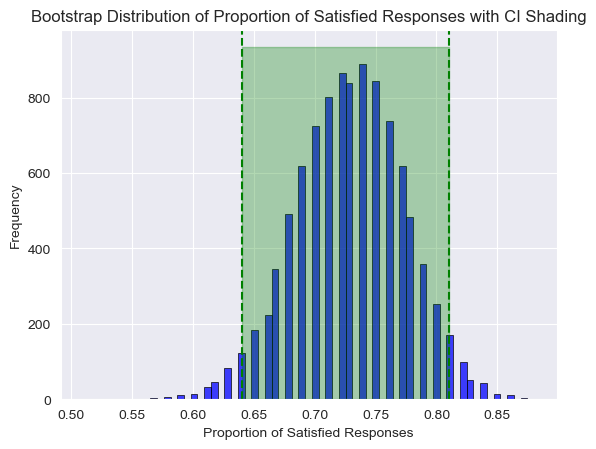

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a bar plot
sns.histplot(boot_distn_one_prop, kde=False, color="blue", edgecolor="black")

# Shade the confidence interval
plt.axvline(x=ci[0], color="green", linestyle="--")  # Lower bound of CI
plt.axvline(x=ci[1], color="green", linestyle="--")  # Upper bound of CI
plt.fill_betweenx(y=[0, plt.gca().get_ylim()[1]], x1=ci[0], x2=ci[1], color='green', alpha=0.3)

plt.xlabel('Proportion of Satisfied Responses')
plt.ylabel('Frequency')
plt.title('Bootstrap Distribution of Proportion of Satisfied Responses with CI Shading')
plt.show()

In [44]:
from scipy import stats
import numpy as np

p_hat = 0.73  # observed proportion
p0 = 0.8      # null hypothesis proportion
n = 100       # sample size

# Calculate z-statistic
z_obs = (p_hat - p0) / np.sqrt((p0 * (1 - p0)) / n)

In [45]:
import plotly.graph_objects as go

# Create a range of values for the x-axis (covering most of the standard normal distribution)
x = np.linspace(-4, 4, 1000)
# Standard normal distribution for y values
y = stats.norm.pdf(x)

# Create the plot
fig = go.Figure(data=[go.Scatter(x=x, y=y, mode='lines', name='Standard Normal Distribution')])

# Shade under the curve for p-value
fig.add_trace(go.Scatter(x=[z_obs, 4], y=[stats.norm.pdf(z_obs), 0], fill='tozeroy', mode='none', name='Shade above z_obs'))
fig.add_trace(go.Scatter(x=[-4, -z_obs], y=[0, stats.norm.pdf(-z_obs)], fill='tozeroy', mode='none', name='Shade below -z_obs'))

# Add line for observed z-statistic
fig.add_trace(go.Scatter(x=[z_obs, z_obs], y=[0, stats.norm.pdf(z_obs)], mode='lines', name='z_obs', line=dict(color="red", dash="dash")))

# Update the layout
fig.update_layout(
    title='Standard Normal Distribution with Shaded P-Value Area',
    xaxis_title='Z-Score',
    yaxis_title='Probability Density'
)

# Show the plot
fig.show()

In [46]:
# Calculate the two-sided p-value
p_value = 2 * stats.norm.cdf(-abs(z_obs))

print("Two-sided P-value:", p_value)

Two-sided P-value: 0.08011831372763392


In [47]:
from statsmodels.stats.proportion import proportions_ztest

# Count the number of 'satisfied' responses
count = (elec_df['satisfy'] == 'satisfied').sum()
# Total number of responses
nobs = len(elec_df)

# Null hypothesis proportion
p0 = 0.8

# Perform the z-test for one proportion
stat, p_value = proportions_ztest(count, nobs, p0)

# Print the results
print("Z-statistic:", stat)
print("P-value:", p_value)

Z-statistic: -1.576720549598802
P-value: 0.11485983984688057


In [48]:
from statsmodels.stats.proportion import proportions_chisquare
import numpy as np

# Assuming elec_df is the pandas DataFrame created previously with the 'satisfy' column

# Count the number of 'satisfied' responses and total responses
count = (elec_df['satisfy'] == 'satisfied').sum()
nobs = len(elec_df)

# Null hypothesis proportion
p0 = 0.8

# Perform the chi-squared test for one proportion
chi2_stat, p_value, expected_count = proportions_chisquare(count, nobs, p0)

# Calculate the 95% confidence interval
p_hat = count / nobs
se = np.sqrt(p0 * (1 - p0) / nobs)
confidence_interval = [p_hat - 1.96 * se, p_hat + 1.96 * se]

# Print the results
print(f"Chi-squared statistic: {chi2_stat}")
print(f"P-value: {p_value}")
print(f"95% Confidence Interval: {confidence_interval}")
print(f"Sample Proportion: {p_hat}")

Chi-squared statistic: 3.0625000000000027
P-value: 0.08011831372763382
95% Confidence Interval: [0.6516, 0.8084]
Sample Proportion: 0.73


In [49]:
import pandas as pd

# Read the CSV file from the URL
offshore = pd.read_csv("https://moderndive.com/data/offshore.csv")

# Create a contingency table
counts = pd.crosstab(offshore['college_grad'], offshore['response'])

# Display the contingency table
print(counts)

response      no opinion  opinion
college_grad                     
no                   131      258
yes                  104      334


In [50]:
import pandas as pd

# Assuming offshore is a pandas DataFrame that has already been loaded

# Convert 'response' to a categorical type if it's not already
if not pd.api.types.is_categorical_dtype(offshore['response']):
    offshore['response'] = pd.Categorical(offshore['response'])

# Reverse the order of categories
offshore['response'] = offshore['response'].cat.reorder_categories(offshore['response'].cat.categories[::-1], ordered=True)

# Display the first few rows to verify the change
print(offshore.head())

  college_grad response
0          yes  opinion
1          yes  opinion
2          yes  opinion
3          yes  opinion
4          yes  opinion


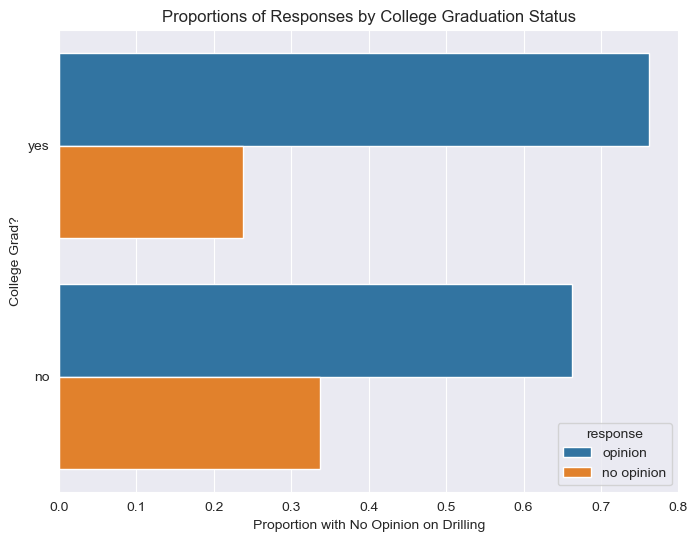

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load and prepare your 'offshore' DataFrame
# ...

# Calculate the proportions
offshore['total'] = offshore.groupby('college_grad')['college_grad'].transform('count')
offshore['proportion'] = offshore.groupby(['college_grad', 'response'])['response'].transform('count') / offshore['total']

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(data=offshore, x='proportion', y='college_grad', hue='response', errorbar=None)

# Adding labels and title
plt.xlabel('Proportion with No Opinion on Drilling')
plt.ylabel('College Grad?')
plt.title('Proportions of Responses by College Graduation Status')

plt.show()

In [54]:
import pandas as pd

# Assuming offshore is a pandas DataFrame that has already been loaded

# Filter for 'no opinion' responses
no_opinion = offshore[offshore['response'] == 'no opinion']

# Calculate proportions of 'no opinion' for 'yes' and 'no' in college_grad
prop_yes = no_opinion[no_opinion['college_grad'] == 'yes'].shape[0] / offshore[offshore['college_grad'] == 'yes'].shape[0]
prop_no = no_opinion[no_opinion['college_grad'] == 'no'].shape[0] / offshore[offshore['college_grad'] == 'no'].shape[0]

# Calculate the difference in proportions
d_hat = prop_yes - prop_no

# Print the result
print("Difference in proportions:", d_hat)

Difference in proportions: -0.09931800307544225


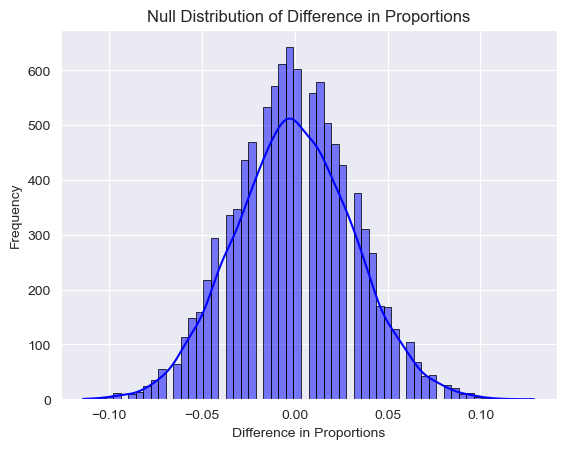

In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming offshore is a pandas DataFrame that has already been loaded

np.random.seed(0)  # Set seed for reproducibility
reps = 10000
null_diff_props = []

for _ in range(reps):
    # Shuffle the 'college_grad' labels
    shuffled_college_grad = offshore['college_grad'].sample(frac=1, replace=False).reset_index(drop=True)
    shuffled_offshore = offshore.copy()
    shuffled_offshore['college_grad'] = shuffled_college_grad

    # Calculate proportions for shuffled data
    shuffled_no_opinion = shuffled_offshore[shuffled_offshore['response'] == 'no opinion']
    prop_yes = shuffled_no_opinion[shuffled_no_opinion['college_grad'] == 'yes'].shape[0] / shuffled_offshore[shuffled_offshore['college_grad'] == 'yes'].shape[0]
    prop_no = shuffled_no_opinion[shuffled_no_opinion['college_grad'] == 'no'].shape[0] / shuffled_offshore[shuffled_offshore['college_grad'] == 'no'].shape[0]

    # Calculate the difference in proportions and append to list
    null_diff_props.append(prop_yes - prop_no)

# Visualize the null distribution
sns.histplot(null_diff_props, kde=True, color='blue', edgecolor='black')
plt.xlabel('Difference in Proportions')
plt.ylabel('Frequency')
plt.title('Null Distribution of Difference in Proportions')
plt.show()

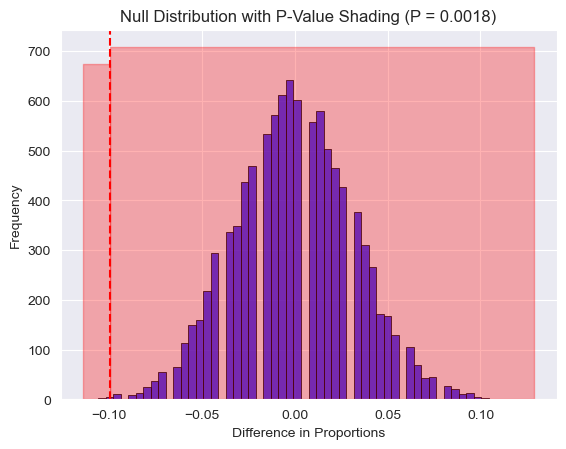

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming null_distn_two_props is a list or array of differences in proportions 
# and d_hat is the observed difference in proportions
null_distn_two_props = null_diff_props
# Plotting the null distribution as a histogram
sns.histplot(null_distn_two_props, kde=False, color="blue", edgecolor="black")

# Calculate the two-sided p-value
p_value_lower = np.mean(np.array(null_distn_two_props) <= d_hat)
p_value_upper = np.mean(np.array(null_distn_two_props) >= d_hat)
p_value = 2 * min(p_value_lower, p_value_upper)

# Shade the area for the p-value
# For a two-sided test, shade both tails
plt.axvline(x=d_hat, color="red", linestyle="--")  # Observed statistic line
lower_bound = min(null_distn_two_props)
upper_bound = max(null_distn_two_props)
plt.fill_betweenx(y=[0, plt.gca().get_ylim()[1]], x1=lower_bound, x2=d_hat, color='red', alpha=0.3)
plt.fill_betweenx(y=[0, plt.gca().get_ylim()[1]], x1=d_hat, x2=upper_bound, color='red', alpha=0.3)

plt.xlabel('Difference in Proportions')
plt.ylabel('Frequency')
plt.title(f'Null Distribution with P-Value Shading (P = {p_value:.4f})')
plt.show()

In [57]:
import numpy as np

# Assuming null_distn_two_props is a list or array of differences in proportions 
# and d_hat is the observed difference in proportions

# Convert the list to a numpy array for efficient computation
null_distn_array = np.array(null_distn_two_props)

# Calculate the two-sided p-value
# Count how many values in the null distribution are as extreme as or more extreme than d_hat
p_value_lower = np.mean(null_distn_array <= d_hat)
p_value_upper = np.mean(null_distn_array >= d_hat)
p_value = 2 * min(p_value_lower, p_value_upper)

# Print the p-value
print("Two-sided P-value:", p_value)


Two-sided P-value: 0.0018


In [58]:
d_hat

-0.09931800307544225

In [59]:
import numpy as np
import pandas as pd

# Assuming offshore is a pandas DataFrame that has already been loaded

reps = 10000  # Number of bootstrap samples
boot_distn_two_props = []

for _ in range(reps):
    # Create a bootstrap sample with replacement
    sample = offshore.sample(n=len(offshore), replace=True)

    # Filter for 'no opinion' responses
    no_opinion = sample[sample['response'] == 'no opinion']

    # Calculate proportions for 'yes' and 'no' in college_grad
    prop_yes = no_opinion[no_opinion['college_grad'] == 'yes'].shape[0] / sample[sample['college_grad'] == 'yes'].shape[0]
    prop_no = no_opinion[no_opinion['college_grad'] == 'no'].shape[0] / sample[sample['college_grad'] == 'no'].shape[0]

    # Calculate the difference in proportions and append to list
    boot_distn_two_props.append(prop_yes - prop_no)

# boot_distn_two_props now contains the bootstrap distribution of the difference in proportions
boot_distn_two_props

[-0.07406690822105744,
 -0.16157009698212368,
 -0.17842809168880103,
 -0.11741790573343786,
 -0.1398776714910565,
 -0.07211470795214636,
 -0.11497115271399974,
 -0.07675693441795495,
 -0.11488256788034729,
 -0.08153273826932306,
 -0.1339406565210739,
 -0.04220695325346491,
 -0.04428435774492678,
 -0.022082776723147957,
 -0.10957259953161591,
 -0.10166050577949892,
 -0.12260096550100083,
 -0.10864414731409802,
 -0.10848039560336545,
 -0.10653476366391967,
 -0.08762844369543338,
 -0.07052709725315515,
 -0.13554677392797498,
 -0.10743952157719738,
 -0.07563954100431625,
 -0.06074634747403623,
 -0.07165109034267914,
 -0.1250029402770917,
 -0.0642955736477634,
 -0.12721618698269377,
 -0.07842229282188956,
 -0.075474902208793,
 -0.09551591242256585,
 -0.1524306784660767,
 -0.15950751593846876,
 -0.07289435177055897,
 -0.11303914674167839,
 -0.07195264885138303,
 -0.07759256009826287,
 -0.1451210951210951,
 -0.126347866854196,
 -0.17100297211869603,
 -0.0925526932084309,
 -0.06453875626289418

In [62]:
import numpy as np

# Assuming boot_distn_two_props is a list or array of bootstrap sample differences in proportions

# Calculate the 95% confidence interval
lower_bound = np.percentile(boot_distn_two_props, 2.5)
upper_bound = np.percentile(boot_distn_two_props, 97.5)
ci = [lower_bound, upper_bound]

# Print the confidence interval
print("95% Confidence Interval: [{}, {}]".format(lower_bound, upper_bound))

95% Confidence Interval: [-0.16083318375028408, -0.036682291951840335]


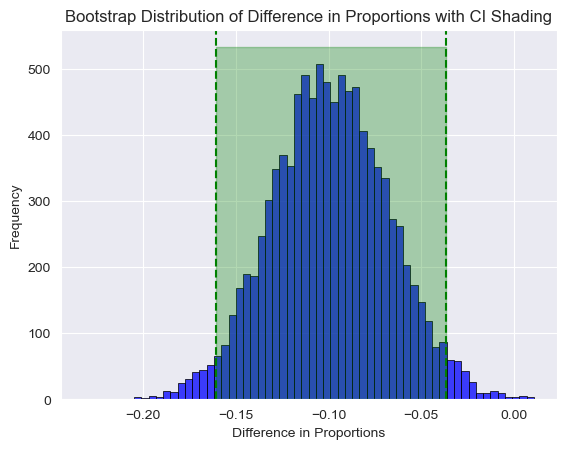

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming boot_distn_two_props is a list or array of bootstrap sample differences in proportions
# Assuming ci is a tuple or list with two elements: (lower_bound, upper_bound)

# Create a histogram
sns.histplot(boot_distn_two_props, kde=False, color="blue", edgecolor="black")

# Shade the confidence interval
plt.axvline(x=ci[0], color="green", linestyle="--")  # Lower bound of CI
plt.axvline(x=ci[1], color="green", linestyle="--")  # Upper bound of CI
plt.fill_betweenx(y=[0, plt.gca().get_ylim()[1]], x1=ci[0], x2=ci[1], color='green', alpha=0.3)

plt.xlabel('Difference in Proportions')
plt.ylabel('Frequency')
plt.title('Bootstrap Distribution of Difference in Proportions with CI Shading')
plt.show()

In [64]:
import pandas as pd
from scipy import stats
import numpy as np

# Assuming offshore is a pandas DataFrame that has already been loaded

# Calculate the proportions and sample sizes
college_grad_group = offshore.groupby('college_grad')['response']
n_yes = college_grad_group.get_group('yes').count()
n_no = college_grad_group.get_group('no').count()
prop_yes = (college_grad_group.get_group('yes') == 'no opinion').mean()
prop_no = (college_grad_group.get_group('no') == 'no opinion').mean()

# Calculate the standard error
se = np.sqrt(prop_yes * (1 - prop_yes) / n_yes + prop_no * (1 - prop_no) / n_no)

# Calculate the z-statistic
z_hat = (prop_yes - prop_no) / se

# Print the z-statistic
print("Z-Statistic:", z_hat)

Z-Statistic: -3.1604306186507682


In [65]:
from scipy.stats import norm

z_stat = -3.16

# Calculate the two-tailed p-value
p_value = 2 * norm.cdf(z_stat)

print("Two-tailed P-value:", p_value)

Two-tailed P-value: 0.0015776913887511443


In [66]:
import pandas as pd

# Read the tab-delimited file
cle_sac = pd.read_csv("https://moderndive.com/data/cleSac.txt", delimiter='\t')

# Rename columns
cle_sac = cle_sac.rename(columns={
    'Metropolitan_area_Detailed': 'metro_area',
    'Total_personal_income': 'income'
})

# Remove rows with missing values
cle_sac = cle_sac.dropna()

print(cle_sac.head())  # Shows the first few rows


   Census_year State_FIPS_code      metro_area  Age     Sex     Race_General  \
0         2000      California  Sacramento_ CA   56    Male         Japanese   
1         2000      California  Sacramento_ CA   53  Female            White   
2         2000      California  Sacramento_ CA   17  Female  Two major races   
3         2000      California  Sacramento_ CA   37  Female            White   
4         2000      California  Sacramento_ CA   40    Male            White   

               Marital_status   income  
0     Married_ spouse present  40240.0  
1     Married_ spouse present  13600.0  
2  Never married/single (N/A)      0.0  
3  Never married/single (N/A)  49000.0  
4  Never married/single (N/A)  38300.0  


In [67]:
import pandas as pd

# Assuming cle_sac is already loaded as a pandas DataFrame

# Group by 'metro_area' and calculate summary statistics for 'income'
inc_summ = cle_sac.groupby('metro_area')['income'].agg(
    sample_size='size',
    mean='mean',
    sd='std',
    minimum='min',
    lower_quartile=lambda x: x.quantile(0.25),
    median='median',
    upper_quartile=lambda x: x.quantile(0.75),
    max='max'
).reset_index()

# Display the summary DataFrame
print(inc_summ)

       metro_area  sample_size          mean            sd  minimum  \
0   Cleveland_ OH          212  27467.066038  27680.682691      0.0   
1  Sacramento_ CA          175  32427.542857  35773.627065      0.0   

   lower_quartile   median  upper_quartile       max  
0          8475.0  21000.0         35275.0  152400.0  
1          8050.0  20000.0         49350.0  206900.0  


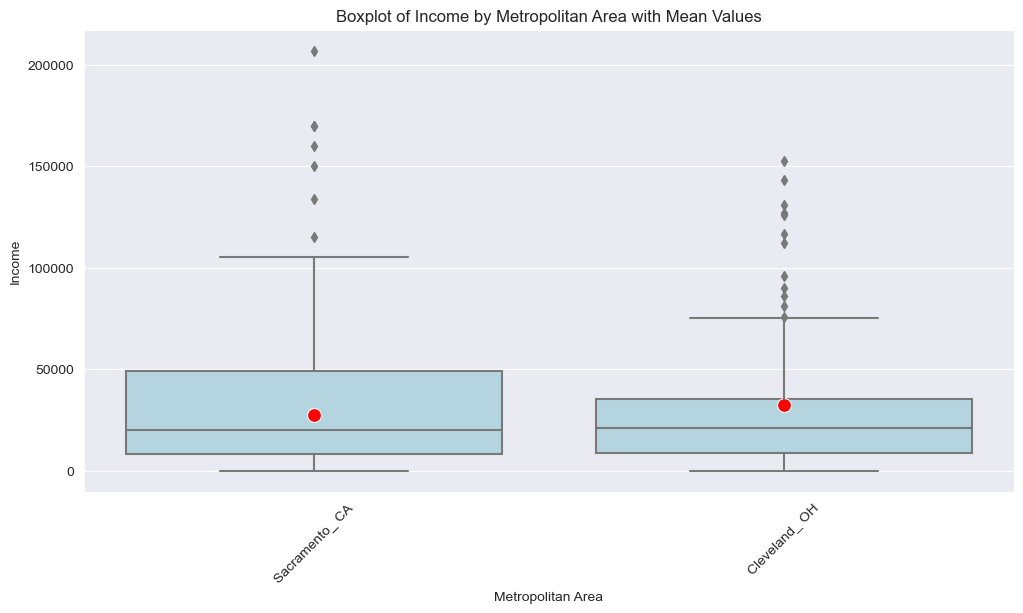

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming cle_sac is already loaded as a pandas DataFrame
# cle_sac = pd.read_csv("https://moderndive.com/data/cleSac.txt", delimiter='\t')
# cle_sac = cle_sac.rename(columns={'Metropolitan_area_Detailed': 'metro_area', 'Total_personal_income': 'income'}).dropna()

# Create a boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='metro_area', y='income', data=cle_sac, color='lightblue')

# Add points for the mean
mean_values = cle_sac.groupby('metro_area')['income'].mean().reset_index()
sns.scatterplot(x='metro_area', y='income', data=mean_values, color='red', s=100)

# Adding labels and title
plt.xlabel('Metropolitan Area')
plt.ylabel('Income')
plt.title('Boxplot of Income by Metropolitan Area with Mean Values')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()

In [79]:
# Calculate the mean income for each group
mean_sacramento = cle_sac[cle_sac['metro_area'] == 'Sacramento_ CA']['income'].mean()
mean_cleveland = cle_sac[cle_sac['metro_area'] == 'Cleveland_ OH']['income'].mean()

# Calculate the difference in means
d_hat = mean_sacramento - mean_cleveland

# Print the result
print("Difference in means (Sacramento, CA - Cleveland, OH):", d_hat)

Difference in means (Sacramento, CA - Cleveland, OH): 4960.476819407006


In [81]:
import pandas as pd
import numpy as np

# Assuming cle_sac is a pandas DataFrame that has already been loaded

reps = 10000  # Number of repetitions
null_distn_two_means = []

for _ in range(reps):
    # Shuffle the 'metro_area' labels
    shuffled_metro_area = cle_sac['metro_area'].sample(frac=1, replace=False).values

    # Group by the shuffled labels and calculate means
    shuffled_cle_sac = cle_sac.copy()
    shuffled_cle_sac['metro_area'] = shuffled_metro_area
    mean_sacramento = shuffled_cle_sac[shuffled_cle_sac['metro_area'] == 'Sacramento_ CA']['income'].mean()
    mean_cleveland = shuffled_cle_sac[shuffled_cle_sac['metro_area'] == 'Cleveland_ OH']['income'].mean()

    # Calculate the difference in means and append to the list
    null_distn_two_means.append(mean_sacramento - mean_cleveland)

# null_distn_two_means now contains the null distribution of the difference in means
null_distn_two_means

[-551.5297574123979,
 1433.7072237196735,
 -1256.4747708894865,
 -3402.22808625337,
 -498.789272237198,
 91.26576819407273,
 5574.440323450137,
 503.6137466307264,
 -266.8604851752025,
 48.70619946091392,
 -194.61353099730695,
 -2940.748840970351,
 -3479.4194609164406,
 -1202.4199460916425,
 -689.0555795148248,
 1195.457088948784,
 5945.125822102422,
 2376.3808086253375,
 3510.5307277628017,
 -6022.458005390836,
 2563.204797843664,
 -1752.2520215633413,
 5539.766792452832,
 4467.912398921835,
 -1632.9391913746622,
 2566.1881401617247,
 1151.0616172506743,
 -2.1566576819423062,
 -1606.2768733153644,
 -2671.6221563342297,
 -1330.3698652291096,
 -1111.7930997304575,
 1446.537681940703,
 -297.4658221024256,
 -3736.3415633423174,
 478.66215633423053,
 -503.31644204851546,
 3992.5387061994625,
 872.9640431266853,
 -1551.9299730458224,
 3773.7533153638797,
 174.0274393530999,
 -1827.0024797843653,
 -6626.74129380054,
 -10031.861455525603,
 2681.870889487869,
 2673.943126684637,
 4663.74900269

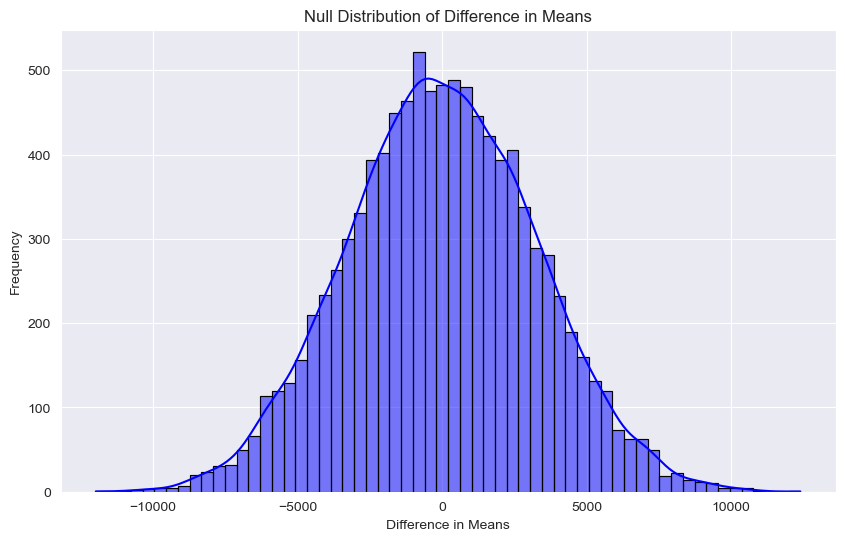

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming null_distn_two_means is a list or array of differences in means from the bootstrap simulation

# Create a histogram to visualize the null distribution
plt.figure(figsize=(10, 6))
sns.histplot(null_distn_two_means, kde=True, color='blue', edgecolor='black')

plt.xlabel('Difference in Means')
plt.ylabel('Frequency')
plt.title('Null Distribution of Difference in Means')
plt.show()

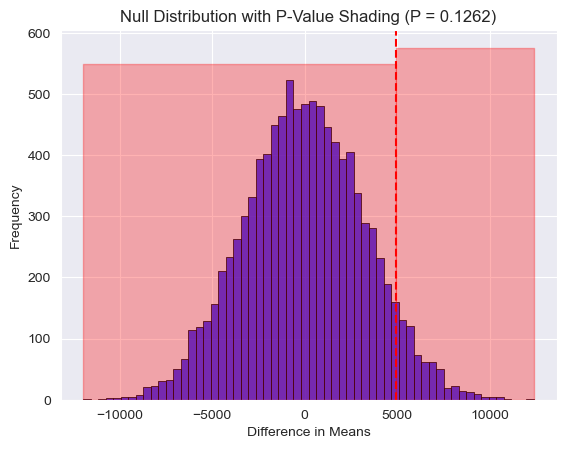

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming null_distn_two_means is a list or array of differences in means 
# and d_hat is the observed difference in means

# Plotting the null distribution as a histogram
sns.histplot(null_distn_two_means, kde=False, color="blue", edgecolor="black")

# Calculate the two-sided p-value
p_value_lower = np.mean(np.array(null_distn_two_means) <= d_hat)
p_value_upper = np.mean(np.array(null_distn_two_means) >= d_hat)
p_value = 2 * min(p_value_lower, p_value_upper)

# Shade the area for the p-value
# For a two-sided test, shade both tails
plt.axvline(x=d_hat, color="red", linestyle="--")  # Observed statistic line
lower_bound = min(null_distn_two_means)
upper_bound = max(null_distn_two_means)
plt.fill_betweenx(y=[0, plt.gca().get_ylim()[1]], x1=lower_bound, x2=d_hat, color='red', alpha=0.3)
plt.fill_betweenx(y=[0, plt.gca().get_ylim()[1]], x1=d_hat, x2=upper_bound, color='red', alpha=0.3)

plt.xlabel('Difference in Means')
plt.ylabel('Frequency')
plt.title(f'Null Distribution with P-Value Shading (P = {p_value:.4f})')
plt.show()

In [84]:
import numpy as np

# Assuming null_distn_two_means is a list or array of differences in means 
# and d_hat is the observed difference in means

# Convert the list to a numpy array for efficient computation
null_distn_array = np.array(null_distn_two_means)

# Calculate the two-sided p-value
# Count how many values in the null distribution are as extreme as or more extreme than d_hat
p_value_lower = np.mean(null_distn_array <= d_hat)
p_value_upper = np.mean(null_distn_array >= d_hat)
p_value = 2 * min(p_value_lower, p_value_upper)

# Print the p-value
print("Two-sided P-value:", p_value)

Two-sided P-value: 0.1262


In [86]:
import pandas as pd
import numpy as np

# Assuming cle_sac is a pandas DataFrame that has already been loaded

reps = 10000  # Number of bootstrap samples
boot_distn_two_means = []

for _ in range(reps):
    # Create a bootstrap sample with replacement
    sample = cle_sac.sample(n=len(cle_sac), replace=True)

    # Calculate means for each group
    mean_sacramento = sample[sample['metro_area'] == 'Sacramento_ CA']['income'].mean()
    mean_cleveland = sample[sample['metro_area'] == 'Cleveland_ OH']['income'].mean()

    # Calculate the difference in means and append to the list
    boot_distn_two_means.append(mean_sacramento - mean_cleveland)

# boot_distn_two_means now contains the bootstrap distribution of the difference in means
boot_distn_two_means

[1219.6647847565291,
 7408.735832748098,
 3073.643950617283,
 11196.87107864203,
 -1883.1825769719726,
 4975.258401551055,
 2188.708857372225,
 5902.914862914862,
 3322.273108328798,
 4583.52093023256,
 8557.774743462433,
 6353.722709551657,
 6528.887389867843,
 7461.947926711666,
 6761.46271604938,
 3864.1227380439486,
 5311.827906976745,
 -2060.0195187165773,
 5507.532129693929,
 2916.8362388027635,
 4351.22948271241,
 3209.0016875340225,
 6192.455364455367,
 139.1089367253735,
 4093.4992736077475,
 6513.103647250955,
 6026.60285361798,
 5402.450980392157,
 5768.403950617285,
 6081.50848010437,
 4417.507091249667,
 5050.398004612991,
 7766.23006051355,
 9252.684490527114,
 9679.99422799423,
 8099.1515118614625,
 5849.858304610087,
 7570.70943396226,
 5290.012938005388,
 9208.82093023256,
 8319.369388742536,
 4489.551769188896,
 8176.9202193430465,
 8635.301729694882,
 4692.4388473738,
 4018.444186046512,
 6168.420930232558,
 3964.7524021497193,
 4738.997426963284,
 5868.727214445989,

In [89]:
import numpy as np

# Assuming boot_distn_two_means is a list or array of bootstrap sample differences in means

# Calculate the 95% confidence interval
lower_bound = np.percentile(boot_distn_two_means, 2.5)
upper_bound = np.percentile(boot_distn_two_means, 97.5)
ci = [lower_bound, upper_bound]

# Print the confidence interval
print("95% Confidence Interval: [{}, {}]".format(lower_bound, upper_bound))

95% Confidence Interval: [-1457.1480842738843, 11507.426437769524]


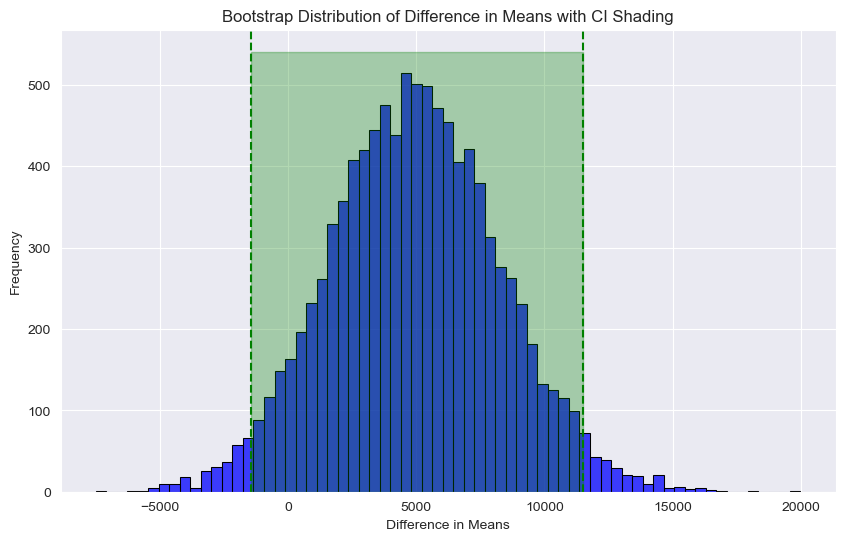

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a histogram to visualize the bootstrap distribution
plt.figure(figsize=(10, 6))
sns.histplot(boot_distn_two_means, kde=False, color='blue', edgecolor='black')

# Shade the confidence interval
plt.axvline(x=ci[0], color='green', linestyle='--')  # Lower bound of CI
plt.axvline(x=ci[1], color='green', linestyle='--')  # Upper bound of CI
plt.fill_betweenx(y=[0, plt.gca().get_ylim()[1]], x1=ci[0], x2=ci[1], color='green', alpha=0.3)

plt.xlabel('Difference in Means')
plt.ylabel('Frequency')
plt.title('Bootstrap Distribution of Difference in Means with CI Shading')
plt.show()

/Users/developerX/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



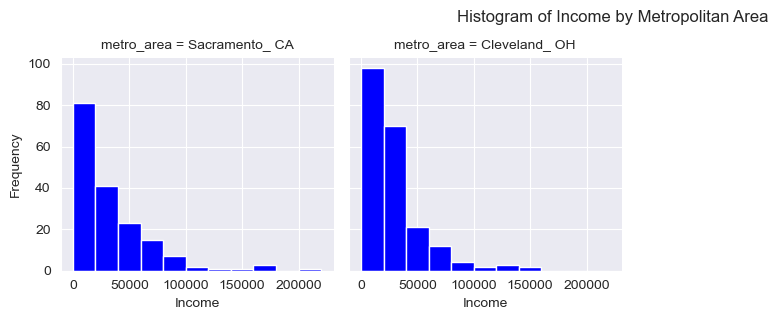

In [92]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Rename columns if necessary
cle_sac = cle_sac.rename(columns={'Metropolitan_area_Detailed': 'metro_area', 'Total_personal_income': 'income'})

# Create a histogram with facet wrap
g = sns.FacetGrid(cle_sac, col='metro_area', col_wrap=4, sharex=True, sharey=True)
g.map(plt.hist, 'income', bins=range(int(cle_sac['income'].min()), int(cle_sac['income'].max()) + 20000, 20000), color='blue', edgecolor='white')

# Adding labels and titles
g.set_axis_labels('Income', 'Frequency')
g.fig.suptitle('Histogram of Income by Metropolitan Area', y=1.05)
plt.show()

In [93]:
from scipy.stats import t
from scipy.stats import norm

# Calculate two-tailed p-value for a t-statistic
t_stat = -1.50
df = min(212 - 1, 175 - 1)  # Degrees of freedom
p_value_t = 2 * t.cdf(t_stat, df)

print("Two-tailed p-value for t-statistic:", p_value_t)

# Calculate two-tailed p-value for a z-statistic
z_stat = -1.50
p_value_z = 2 * norm.cdf(z_stat)

print("Two-tailed p-value for z-statistic:", p_value_z)

Two-tailed p-value for t-statistic: 0.1354266805194864
Two-tailed p-value for z-statistic: 0.13361440253771614


In [94]:
import pandas as pd

# Read the CSV file
zinc_tidy = pd.read_csv("https://moderndive.com/data/zinc_tidy.csv")

# Define a function to calculate the difference
def calculate_diff(group):
    return pd.Series({'pair_diff': group['concentration'].diff().iloc[-1]})

# Group by 'loc_id', calculate differences, and reset index
zinc_diff = zinc_tidy.groupby('loc_id').apply(calculate_diff).reset_index()

# Display the first few rows of the DataFrame
print(zinc_diff.head())

   loc_id  pair_diff
0     1.0     -0.015
1     2.0     -0.028
2     3.0     -0.177
3     4.0     -0.121
4     5.0     -0.102


In [95]:
# Calculate the mean of the pair_diff column
d_hat = zinc_diff['pair_diff'].mean()

print("Mean of pair_diff:", d_hat)

Mean of pair_diff: -0.0804


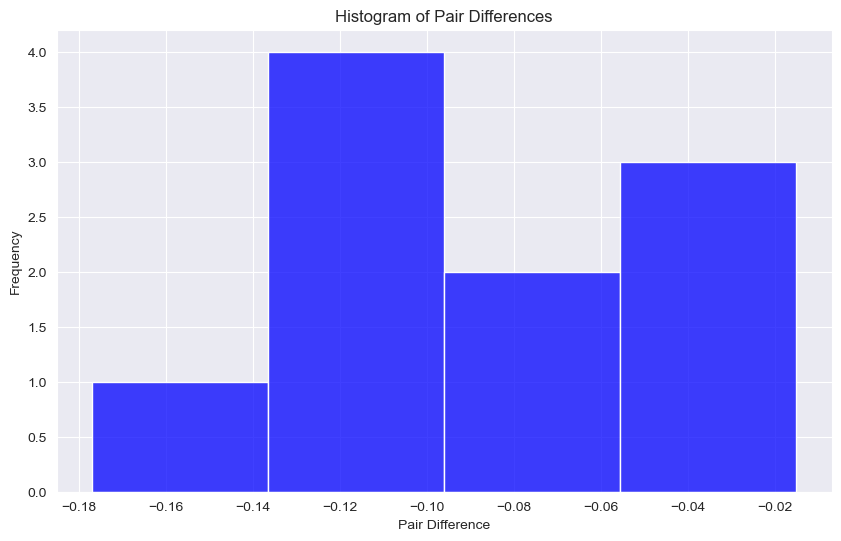

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming zinc_diff is a pandas DataFrame that has already been loaded

# Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(zinc_diff['pair_diff'], bins=int((zinc_diff['pair_diff'].max() - zinc_diff['pair_diff'].min()) / 0.04), kde=False, color='blue', edgecolor='white')

# Adding labels and title
plt.xlabel('Pair Difference')
plt.ylabel('Frequency')
plt.title('Histogram of Pair Differences')
plt.show()

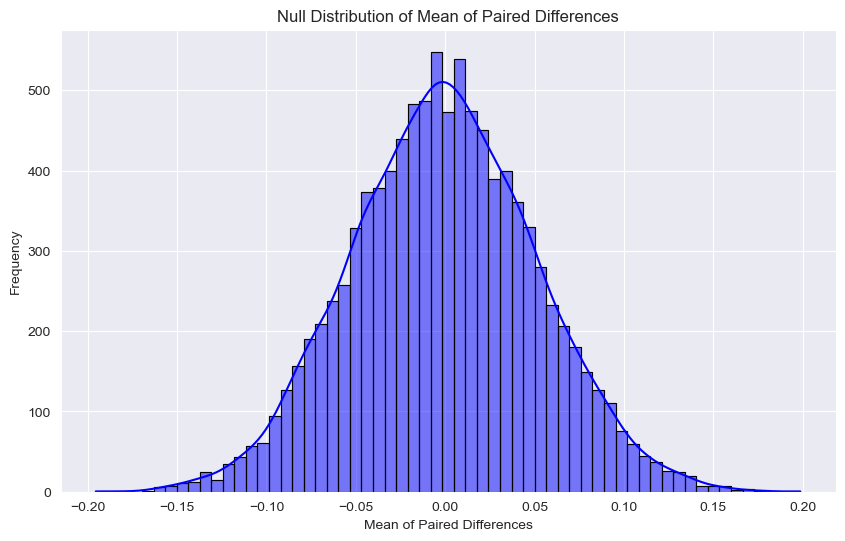

In [97]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming zinc_diff is a pandas DataFrame that has already been loaded

np.random.seed(0)  # For reproducibility
reps = 10000  # Number of repetitions
mu = 0  # Null hypothesis mean
std_dev = zinc_diff['pair_diff'].std()  # Standard deviation of the original data

# Generating the null distribution of sample means
null_distn_paired_means = np.random.normal(mu, std_dev, reps)

# Visualize the null distribution
plt.figure(figsize=(10, 6))
sns.histplot(null_distn_paired_means, kde=True, color='blue', edgecolor='black')
plt.xlabel('Mean of Paired Differences')
plt.ylabel('Frequency')
plt.title('Null Distribution of Mean of Paired Differences')
plt.show()

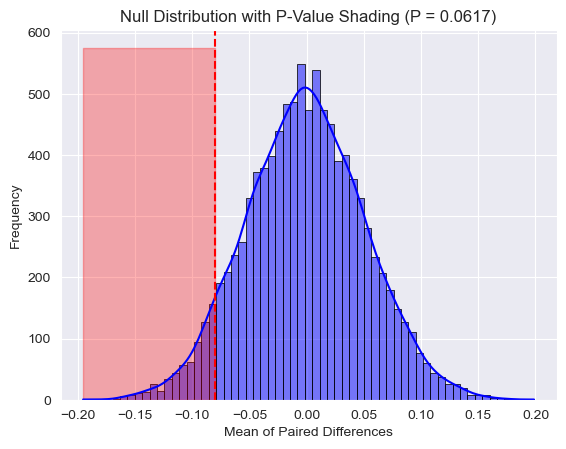

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming null_distn_paired_means is a numpy array of mean values 
# and d_hat is the observed mean difference

# Plotting the null distribution as a histogram
sns.histplot(null_distn_paired_means, kde=True, color="blue", edgecolor="black")

# Calculate the one-sided p-value (for 'less' direction)
p_value = np.mean(null_distn_paired_means <= d_hat)

# Shade the area for the p-value
plt.axvline(x=d_hat, color="red", linestyle="--")  # Observed statistic line
plt.fill_betweenx(y=[0, plt.gca().get_ylim()[1]], x1=min(null_distn_paired_means), x2=d_hat, color='red', alpha=0.3)

plt.xlabel('Mean of Paired Differences')
plt.ylabel('Frequency')
plt.title(f'Null Distribution with P-Value Shading (P = {p_value:.4f})')
plt.show()

In [99]:
d_hat

-0.0804

In [100]:
null_distn_paired_means

array([ 0.09221269,  0.0209175 ,  0.05116178, ...,  0.02701857,
       -0.00172087,  0.06785646])

In [101]:
import numpy as np

# Assuming null_distn_paired_means is a numpy array of mean values 
# and d_hat is the observed mean difference

# Calculate the one-sided p-value (for 'less' direction)
p_value = np.mean(null_distn_paired_means <= d_hat)

print("One-sided P-value (less):", p_value)

One-sided P-value (less): 0.0617


In [102]:
import numpy as np
import pandas as pd

# Assuming zinc_diff is a pandas DataFrame that has already been loaded and contains the pair_diff column

reps = 10000  # Number of bootstrap samples
boot_distn_paired_means = []

for _ in range(reps):
    # Create a bootstrap sample with replacement
    sample = zinc_diff['pair_diff'].sample(n=len(zinc_diff), replace=True)
    
    # Calculate the mean of the sample and append to the list
    boot_distn_paired_means.append(sample.mean())

# boot_distn_paired_means now contains the bootstrap distribution of the mean of paired differences
boot_distn_paired_means

[-0.06110000000000001,
 -0.06280000000000002,
 -0.07089999999999999,
 -0.08329999999999997,
 -0.07769999999999999,
 -0.07070000000000003,
 -0.0758,
 -0.0914,
 -0.08659999999999998,
 -0.09509999999999999,
 -0.08549999999999999,
 -0.09139999999999997,
 -0.06020000000000001,
 -0.0693,
 -0.09709999999999999,
 -0.11279999999999997,
 -0.10699999999999998,
 -0.101,
 -0.0743,
 -0.09839999999999997,
 -0.10030000000000001,
 -0.0728,
 -0.086,
 -0.0978,
 -0.07269999999999999,
 -0.06920000000000001,
 -0.08879999999999999,
 -0.07579999999999999,
 -0.10709999999999997,
 -0.07980000000000001,
 -0.059899999999999995,
 -0.0989,
 -0.1289,
 -0.0708,
 -0.09389999999999998,
 -0.1032,
 -0.11039999999999998,
 -0.05669999999999999,
 -0.07379999999999998,
 -0.0656,
 -0.0629,
 -0.09489999999999998,
 -0.09569999999999998,
 -0.0779,
 -0.094,
 -0.11059999999999999,
 -0.09389999999999998,
 -0.08959999999999999,
 -0.10439999999999997,
 -0.0883,
 -0.07070000000000001,
 -0.0529,
 -0.06570000000000001,
 -0.0992999999999

In [103]:
# Calculate the 95% confidence interval
lower_bound = np.percentile(boot_distn_paired_means, 2.5)
upper_bound = np.percentile(boot_distn_paired_means, 97.5)
ci = [lower_bound, upper_bound]
# Print the confidence interval
print("95% Confidence Interval: [{}, {}]".format(lower_bound, upper_bound))

95% Confidence Interval: [-0.11179999999999998, -0.05070000000000001]


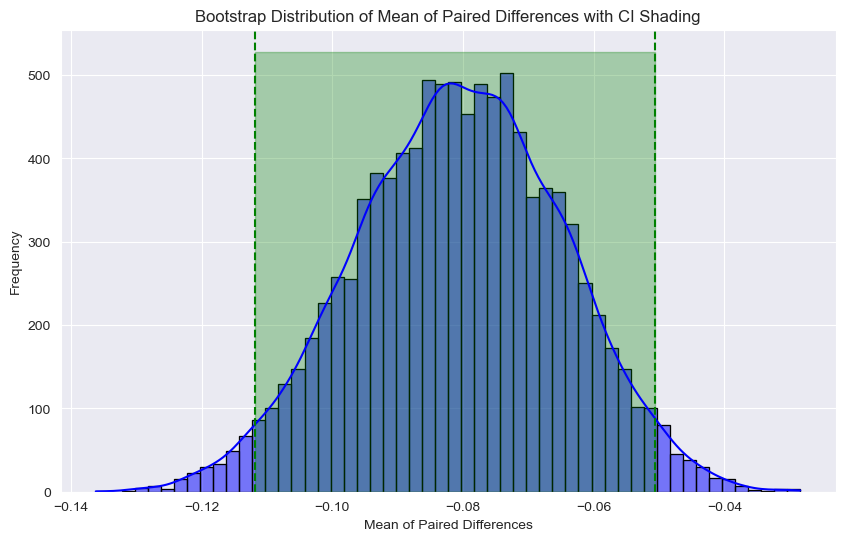

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming boot_distn_paired_means is a list or array of bootstrap sample means
# Assuming ci is calculated as shown in the previous step

# Create a histogram to visualize the bootstrap distribution
plt.figure(figsize=(10, 6))
sns.histplot(boot_distn_paired_means, kde=True, color='blue', edgecolor='black')

# Shade the confidence interval
plt.axvline(x=ci[0], color='green', linestyle='--')  # Lower bound of CI
plt.axvline(x=ci[1], color='green', linestyle='--')  # Upper bound of CI
plt.fill_betweenx(y=[0, plt.gca().get_ylim()[1]], x1=ci[0], x2=ci[1], color='green', alpha=0.3)

plt.xlabel('Mean of Paired Differences')
plt.ylabel('Frequency')
plt.title('Bootstrap Distribution of Mean of Paired Differences with CI Shading')
plt.show()

In [105]:
from scipy import stats

# Assuming zinc_diff is a pandas DataFrame that has already been loaded and contains the pair_diff column

# Perform the one-sample t-test
t_statistic, p_value = stats.ttest_1samp(zinc_diff['pair_diff'], 0)

# For a one-sided test ("less"), the p-value needs to be halved, and only if the t-statistic is negative
if t_statistic < 0:
    p_value /= 2
else:
    p_value = 1 - (p_value / 2)

# Print the results
print("T-statistic:", t_statistic)
print("One-sided P-value (less):", p_value)

T-statistic: -4.863812745135183
One-sided P-value (less): 0.00044555772891127397


In [106]:
from scipy import stats
import numpy as np

# Assuming zinc_diff is a pandas DataFrame that has already been loaded and contains the pair_diff column

# Perform the one-sample t-test
t_statistic, p_value_two_tailed = stats.ttest_1samp(zinc_diff['pair_diff'], 0)

# Adjust p-value for a one-sided test
p_value = p_value_two_tailed / 2 if t_statistic < 0 else 1 - p_value_two_tailed / 2

# Calculate the sample mean
mean_diff = zinc_diff['pair_diff'].mean()

# Calculate the standard error
std_err = zinc_diff['pair_diff'].std() / np.sqrt(len(zinc_diff))

# Calculate the upper confidence limit for a 95% one-sided confidence interval
# t.ppf(0.95, df) retrieves the critical value at 95% for the given degrees of freedom
upper_ci = mean_diff + stats.t.ppf(0.95, len(zinc_diff) - 1) * std_err

# Print the results
print("T-statistic:", t_statistic)
print("P-value (one-sided):", p_value)
print("Mean Difference:", mean_diff)
print("Upper Confidence Interval:", upper_ci)

T-statistic: -4.863812745135183
P-value (one-sided): 0.00044555772891127397
Mean Difference: -0.0804
Upper Confidence Interval: -0.05009820025806609


In [107]:
from scipy.stats import t
import pandas as pd

# Assuming zinc_diff is a pandas DataFrame that has already been loaded

# Calculate degrees of freedom
df = len(zinc_diff) - 1

# Calculate the lower tail probability
t_statistic = -4.8638
p_value = t.cdf(t_statistic, df)

print("Lower tail probability:", p_value)

Lower tail probability: 0.0004455655916189784
